### 20 Mpc/h Pair Kappa Map - Control Map with ±10 Mpc/h Peaks

In [86]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.cosmology import Planck18 as cosmo
from tqdm.notebook import tqdm
from helper import preprocess_catalog_galactic
from helper import load_catalog

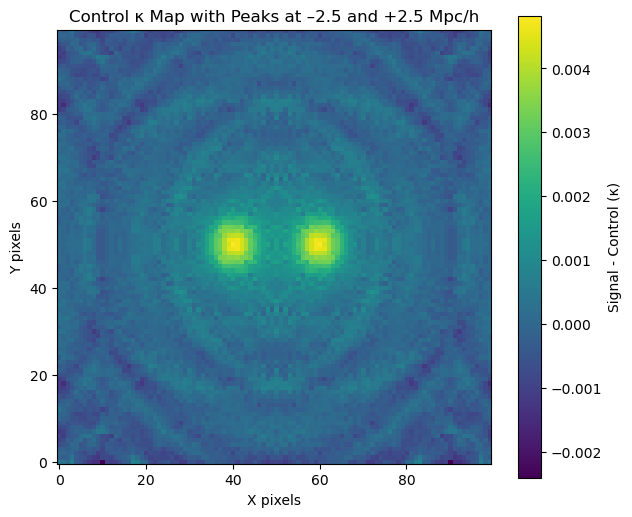

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

separation = 20

# --- Load CSVs ---
signal = pd.read_csv(f"data/kappa_sym_{separation}hmpc_NGCSGC.csv", index_col=0).values
center = pd.read_csv("data/kappa_control_original.csv", index_col=0).values

box_size_hmpc = 100.0
h = cosmo.h
grid_size = 100
cell_size_hmpc = box_size_hmpc / grid_size

# --- Make Control Pair Map (±10 Mpc/h peaks) ---
shift_hmpc = separation/2
shift_pix = int(np.round(shift_hmpc / cell_size_hmpc))  # convert to pixels

# Take the single-galaxy stacked κ map (already symmetrized if desired)
base_map = center  # or kappa_smooth or kappa_sub, depending on what you want

# Shift left and right
map_left  = np.roll(base_map, -shift_pix, axis=1)  # shift to -10 Mpc/h
map_right = np.roll(base_map, +shift_pix, axis=1)  # shift to +10 Mpc/h

# Add them up to create a control "pair" map
control = map_left + map_right

# --- Crop to same shape if needed ---
min_size = min(signal.shape[0], control.shape[0])
signal = signal[:min_size, :min_size]
control = control[:min_size, :min_size]

# --- Subtract ---
filaments = signal - control

# --- Save to CSV ---
# pd.DataFrame(filaments).to_csv("filaments.csv", header=False, index=False)
# print(f"✅ Filament map saved as filaments.csv with shape {filaments.shape}")

# --- Plot ---
plt.figure(figsize=(7, 6))
im = plt.imshow(control, origin="lower", cmap="viridis")
plt.colorbar(im, label="Signal - Control (κ)")
# plt.title("Filament Map (Signal – Control) 5Mpc/h")
plt.title("Control κ Map with Peaks at –2.5 and +2.5 Mpc/h")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.show()